In [121]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras import optimizers


In [122]:
data = []
labels = []
height=128
width=128
channels = 3
classes = 2
parasitized_data = os.listdir('hymenoptera/train/ants')
print(parasitized_data[:20])

uninfected_data = os.listdir('hymenoptera/train/bees')
print('\n')
print(uninfected_data[:20])

['army-ants-red-picture.jpg', '162603798_40b51f1654.jpg', '474806473_ca6caab245.jpg', '36439863_0bec9f554f.jpg', '1099452230_d1949d3250.jpg', '1225872729_6f0856588f.jpg', '207947948_3ab29d7207.jpg', '1917341202_d00a7f9af5.jpg', '1368913450_e146e2fb6d.jpg', '154124431_65460430f2.jpg', '522163566_fec115ca66.jpg', '1808777855_2a895621d7.jpg', '518773929_734dbc5ff4.jpg', '339670531_94b75ae47a.jpg', '1924473702_daa9aacdbe.jpg', 'termite-vs-ant.jpg', 'swiss-army-ant.jpg', '460372577_f2f6a8c9fc.jpg', 'ant photos.jpg', '2265825502_fff99cfd2d.jpg']


['154600396_53e1252e52.jpg', '354167719_22dca13752.jpg', '2651621464_a2fa8722eb.jpg', '36900412_92b81831ad.jpg', '2580598377_a4caecdb54.jpg', '2358061370_9daabbd9ac.jpg', '446296270_d9e8b93ecf.jpg', '2445215254_51698ff797.jpg', '509247772_2db2d01374.jpg', '90179376_abc234e5f4.jpg', '2722592222_258d473e17.jpg', '2704348794_eb5d5178c2.jpg', '132826773_dbbcb117b9.jpg', '465133211_80e0c27f60.jpg', '2617161745_fa3ebe85b4.jpg', '2959730355_416a18c63c.jpg

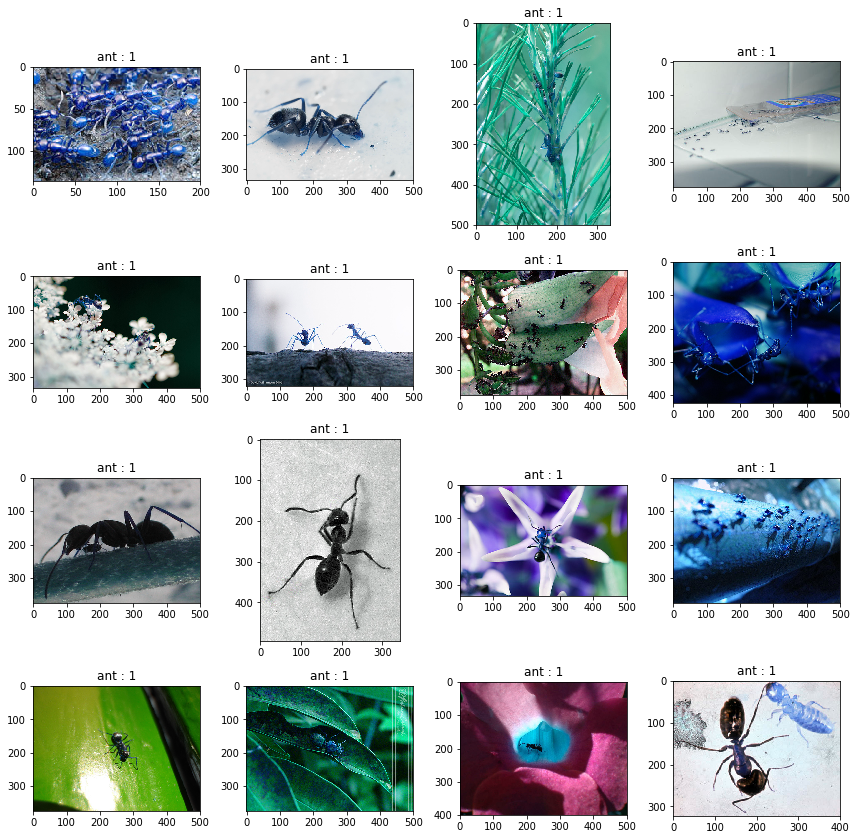

In [123]:
plt.figure(figsize = (12,12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('hymenoptera/train/ants' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('ant : 1')
    plt.tight_layout()
plt.show()


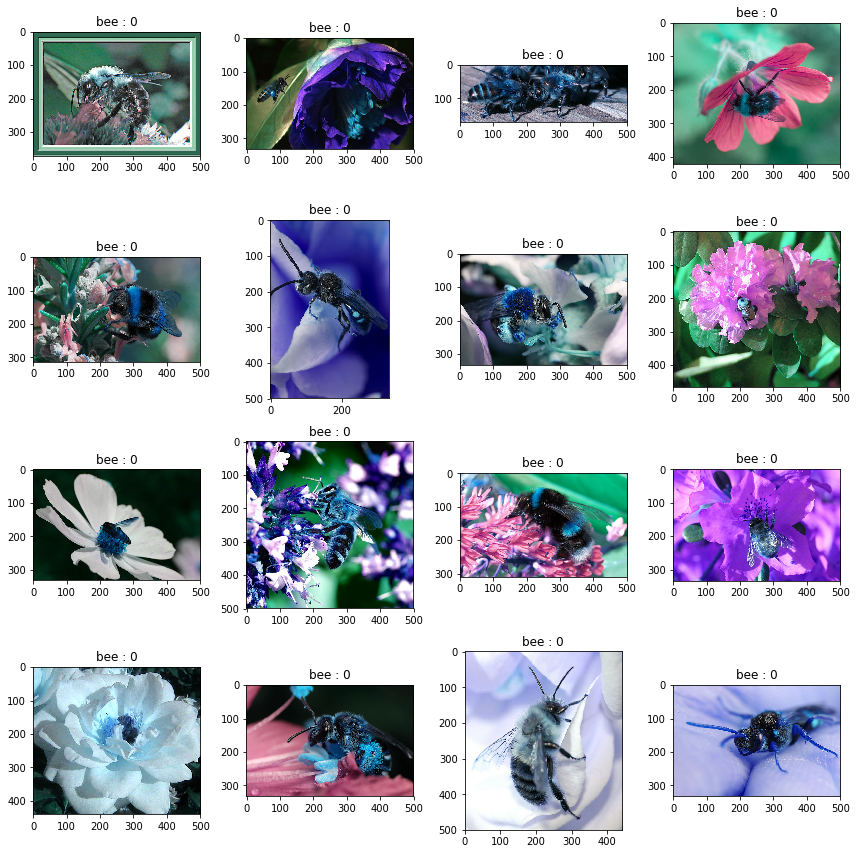

In [124]:
plt.figure(figsize = (12,12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('hymenoptera/train/bees' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('bee : 0')
    plt.tight_layout()
plt.show()

In [125]:

for img in parasitized_data:
        img_read = plt.imread('hymenoptera/train/ants/' + "/" + img)
        img_resize = cv2.resize(img_read, (height, width))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
        
for img in uninfected_data:
        img_read = plt.imread('hymenoptera/train/bees' + "/" + img)
        img_resize = cv2.resize(img_read, (height, width))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)

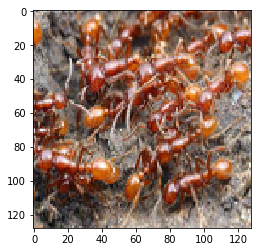

In [126]:
plt.imshow(data[0]/255)
plt.show()

In [127]:
image_data = np.array(data[-0])
labels = np.array(labels)

In [128]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [129]:
x_train, x_test, y_train, y_test = train_test_split(image_data,labels, 
                                                    test_size = 0.2,
                                                    random_state = 11)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [130]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (102, 128, 3)
SHAPE OF TESTING IMAGE DATA : (26, 128, 3)
SHAPE OF TRAINING LABELS : (102, 2)
SHAPE OF TESTING LABELS : (26, 2)


In [131]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()    
    inputShape = (height, width, channels)
    chanDim = -1
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [132]:
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
dropout_25 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 30, 30, 32)        128       
__________

In [133]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'Adam', metrics = ['accuracy'])

In [134]:
h = model.fit(x_train, y_train, epochs = 20, batch_size = 4)

ValueError: Error when checking input: expected conv2d_19_input to have 4 dimensions, but got array with shape (102, 128, 3)

In [92]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

NameError: name 'h' is not defined

<Figure size 1296x576 with 0 Axes>

In [93]:
predictions = model.evaluate(x_test, y_test)

ValueError: Error when checking input: expected conv2d_13_input to have 4 dimensions, but got array with shape (24, 118, 3)

In [94]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

NameError: name 'predictions' is not defined